Author: Roel De Los Santos <br />
Topic: Module 5 Challenge <br />
Date: 8/10/23


# WeatherPy


---

## Starter Code List of Cities

In [6]:
# Dependencies 
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from datetime import datetime
cities_file = "cities.csv"

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import citipy 
from citipy import citipy




### Cities List Using `citipy` 

In [7]:
# List for lat_lngs and cities
lat_lngs = []
cities = []

# Create a lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify cities for lat, lng 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add to list
    if city not in cities:
        cities.append(city)

# Print
len(cities)


604

---

# DataFrame list </br>
### Use the OpenWeatherMap API to retrieve weather data for cities listed </br> 
### created plots showcased Weather Variables and Latitude </br> 

In [3]:

## Create a list to put CityD dictionary into
CityD_list = []

## Create a dictionary for latitude and longditude of each city and Create counter
Cityg_Dict = {}
RSuccess = 1
Rec = 1
Set = 1

## Start the loop for the dictionary 
for city in cities:
    if Rec == 1:
        print("Beginning Data Retrieval")
        print("-----------------------------")
        
        try:
            response = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}")
            CLL_Resp = response.json()

            ## start dwelling in to dictionary and Create lat for next lookup
            Cityg_Dict["City"]=city
            Cityg_Dict["Lat"]=CLL_Resp[0]['lat']
            Cityg_Dict["Lng"]=CLL_Resp[0]['lon']
            Lat = CLL_Resp[0]['lat']
            Lng = CLL_Resp[0]['lon']

            ## Call response 
            response2 = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={Lat}&lon={Lng}&units=metric&appid={weather_api_key}")
            CLL_Resp2 = response2.json()

            ## start dwelling in to dictionary
            Cityg_Dict["Max Temp"]=CLL_Resp2['main']['temp_max']
            Cityg_Dict["Humidity"]=CLL_Resp2['main']['humidity']
            Cityg_Dict["Cloudiness"]=CLL_Resp2['clouds']["all"]
            Cityg_Dict["Wind Speed"]=CLL_Resp2['wind']["speed"]
            Cityg_Dict["Country"]=CLL_Resp2['sys']["country"]
            Cityg_Dict["Date"]=CLL_Resp2['dt']

            ## create to CityD_list for dictionary and print
            CityD_list.append(Cityg_Dict)
            Cityg_Dict = {}

            print(f"Processing Record {RSuccess} of Set {Set} | {city}")
            RSuccess = RSuccess+1
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1


        except:
            print(f"City '{city}' not found. Skipping...")
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1
    else:
        try:
            response = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}")
            CLL_Resp = response.json()
    
            ## start dwelling in to dictionary
            Cityg_Dict["City"]=city
            Cityg_Dict["Lat"]=CLL_Resp[0]['lat']
            Cityg_Dict["Lng"]=CLL_Resp[0]['lon']

            ## Create lat for next lookup
            Lat = CLL_Resp[0]['lat']
            Lng = CLL_Resp[0]['lon']

            ## Call response 
            response2 = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat={Lat}&lon={Lng}&units=metric&appid={weather_api_key}")
            CLL_Resp2 = response2.json()

            ## start dwelling in to dictionary
            Cityg_Dict["Max Temp"]=CLL_Resp2['main']['temp_max']
            Cityg_Dict["Humidity"]=CLL_Resp2['main']['humidity']
            Cityg_Dict["Cloudiness"]=CLL_Resp2['clouds']["all"]
            Cityg_Dict["Wind Speed"]=CLL_Resp2['wind']["speed"]
            Cityg_Dict["Country"]=CLL_Resp2['sys']["country"]
            Cityg_Dict["Date"]=CLL_Resp2['dt']


            ## create to CityD_list for dictionary and print
            CityD_list.append(Cityg_Dict)
            Cityg_Dict = {}

            print(f"Processing Record {RSuccess} of Set {Set} | {city}")
            RSuccess = RSuccess+1
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1
                
        except:
            print(f"City '{city}' not found. Skipping...")
            if Rec == len(cities):
                print("-----------------------------")
                print("Data Retrieval Complete")    
                print("-----------------------------")
            else:
                Rec = Rec + 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | amga
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | bowie
Processing Record 6 of Set 1 | adamstown
City 'tsiombe' not found. Skipping...
Processing Record 7 of Set 1 | puerto armuelles
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | okha
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | zaragoza
Processing Record 13 of Set 1 | puerto san carlos
Processing Record 14 of Set 1 | pangody
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | kataragama
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | lobito
Processing Record 21 of Set 1 | tura
Processing Reco

In [6]:
## List of Dictionaries created into a CityW_df for Dataframe 
CityW_df = pd.DataFrame(CityD_list)

## Export data into csv 
CityW_df.to_csv(f'Cities.csv', index = False)

## Display 
CityW_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amga,60.894218,131.979980,17.84,70,99,1.95,RU,1691644042
1,edinburgh of the seven seas,-37.067589,-12.310830,10.33,59,67,10.09,SH,1691644043
2,san patricio,27.969532,-97.773172,29.36,81,0,7.76,US,1691644044
3,puerto ayora,-0.747167,-90.313420,24.55,94,61,2.68,EC,1691644045
4,bowie,38.942446,-76.730172,24.90,87,0,2.57,US,1691644046


In [8]:
## Create a statistical summary for DateFrame
Percentile = [.25,.50,.75]

# List of dtypes to include
include =['object', 'float', 'int']

# Describing method
CWSumm = CityW_df.describe(percentiles = Percentile, include = include)
CWSumm.to_csv(f'output_data.csv', index = False)
# Display 
CWSumm

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,558,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558,5.580000e+02
unique,558,NaN,NaN,NaN,NaN,NaN,NaN,132,NaN
top,amga,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN
mean,NaN,20.628583,12.063930,21.287903,71.261649,51.860215,3.503136,NaN,1.691644e+09
std,NaN,32.405079,89.006185,7.425886,21.365411,38.702732,2.311708,NaN,1.863915e+02
min,NaN,-54.806116,-176.174022,-4.780000,8.000000,0.000000,0.000000,NaN,1.691644e+09
25%,NaN,-4.472228,-65.951733,16.010000,58.000000,9.000000,1.672500,NaN,1.691644e+09
50%,NaN,22.913611,12.381394,21.980000,78.000000,52.500000,3.090000,NaN,1.691644e+09
75%,NaN,48.509574,84.849800,27.095000,88.000000,94.000000,4.767500,NaN,1.691644e+09


#### Created Scatter Plots Latitude Vs. Temperature

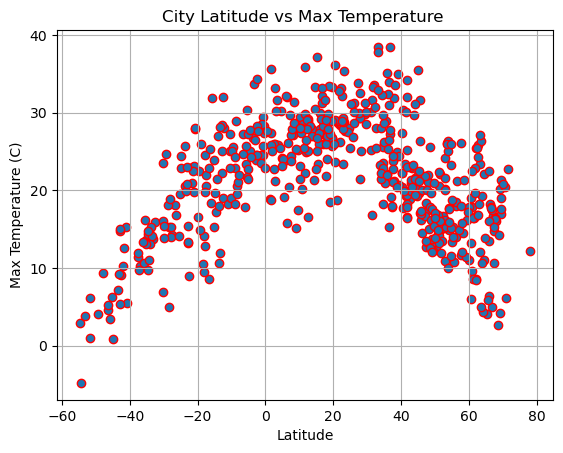

In [20]:
# Create title, xlabel, ylabel, grid   
plt.title(f"City Latitude vs Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Create scatter, savefig  
plt.scatter(CityW_df["Lat"],CityW_df["Max Temp"], marker = "o", edgecolor = "red")
plt.savefig(f'output_data')
# Display
plt.show()

#### Latitude Vs. Humidity

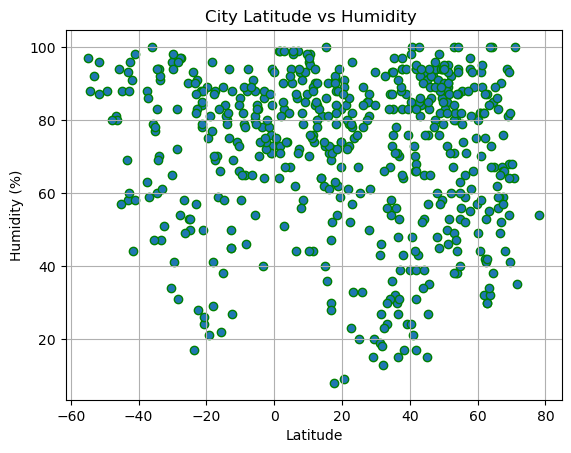

In [16]:
# Create title, xlabel, ylabel, grid  
plt.title(f"City Latitude vs Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Create scatter, savefig 
plt.scatter(CityW_df["Lat"],CityW_df["Humidity"], marker = "o", edgecolor = "green")
plt.savefig(f'output_data')
# Display
plt.show()

#### Latitude Vs. Cloudiness

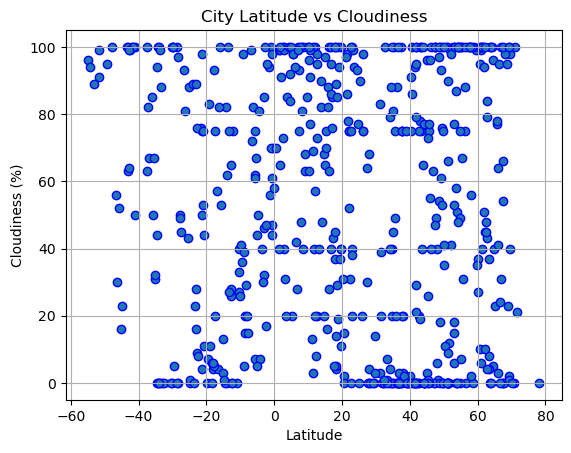

In [18]:
# Create title, xlabel, ylabel, grid 
plt.title(f"City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Create scatter, savefig 
plt.scatter(CityW_df["Lat"],CityW_df["Cloudiness"], marker = "o", edgecolor = "blue")
plt.savefig(f'output_data')
# Display
plt.show()

#### Latitude vs. Wind Speed 

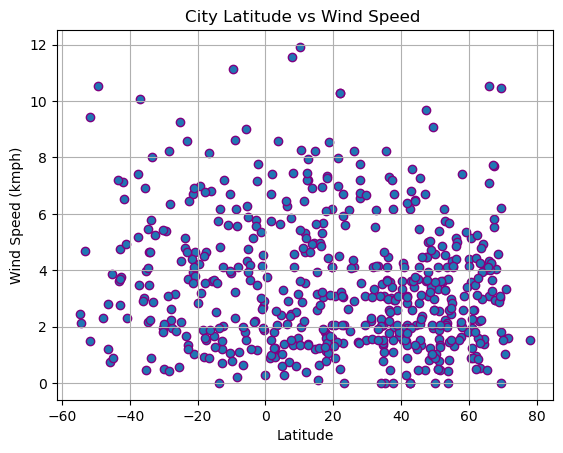

In [22]:
# Create title, xlabel, ylabel, grid
plt.title(f"City Latitude vs Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.grid()
# Create scatter, savefig 
plt.scatter(CityW_df["Lat"],CityW_df["Wind Speed"], marker = "o", edgecolor = "purple")
plt.savefig(f'output_data')
# Display
plt.show()

---

# Linear Regression



In [23]:
## Create a dataframe for Northern hemisphere called CityWNH_df
CityWNH_df = CityW_df[CityW_df.Lat >=0]
CityWNH_df.to_csv(f'output_data.csv', index = False)
CityWNH_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amga,60.894218,131.979980,17.84,70,99,1.95,RU,1691644042
2,san patricio,27.969532,-97.773172,29.36,81,0,7.76,US,1691644044
4,bowie,38.942446,-76.730172,24.90,87,0,2.57,US,1691644046
6,puerto armuelles,8.272560,-82.860446,27.41,91,100,1.34,PA,1691644048
8,fort bragg,35.140311,-79.154146,25.97,83,0,3.09,US,1691644050


In [24]:
## Create a dataframe for southern hemisphere called CityWSH_df
CityWSH_df = CityW_df[CityW_df.Lat <0]
CityWSH_df.to_csv(f"output_data.csv",index=False)
CityWSH_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,edinburgh of the seven seas,-37.067589,-12.310830,10.33,59,67,10.09,SH,1691644043
3,puerto ayora,-0.747167,-90.313420,24.55,94,61,2.68,EC,1691644045
5,adamstown,-25.066667,-130.100205,19.50,53,88,9.25,PN,1691644047
7,port-aux-francais,-49.349761,70.219956,4.03,88,95,10.53,TF,1691644049
12,puerto san carlos,-12.660754,-63.550020,25.07,50,26,0.72,BR,1691644054


###  Temperature vs. Latitude Linear "Northern Hemisphere"

r-value is: 0.39628108542015017


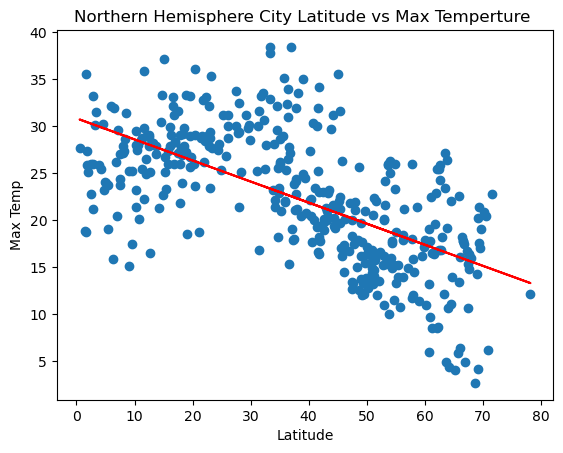

In [25]:
# Linear regression on Northern Hemisphere
x_values = CityWNH_df['Lat']
y_values = CityWNH_df['Max Temp']
# Call the function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Max Temperture ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

###  Temperature vs. Latitude Linear "Southern Hemisphere"

r-value is: 0.6651265585784618


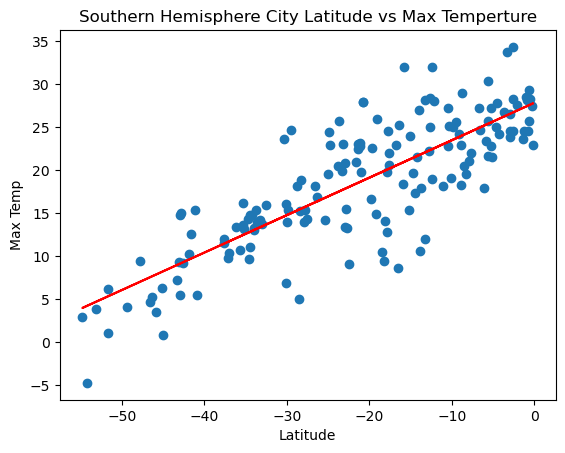

In [26]:
# Linear regression on Southern Hemisphere
x_values = CityWSH_df['Lat']
y_values = CityWSH_df['Max Temp']
# Call the function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Max Temperture")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

### Humidity vs. Latitude Linear Regression "Northern Hemisphere"

r-value is: 0.009402033221888725


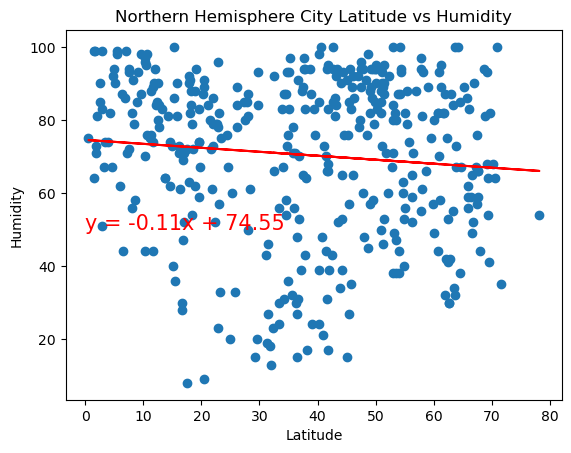

In [27]:
# Linear regression on Northern Hemisphere
x_values = CityWNH_df['Lat']
y_values = CityWNH_df['Humidity']
# Call the function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

### Humidity vs. Latitude Linear Regression "Southern Hemisphere"

r-value is: 0.006967610732522421


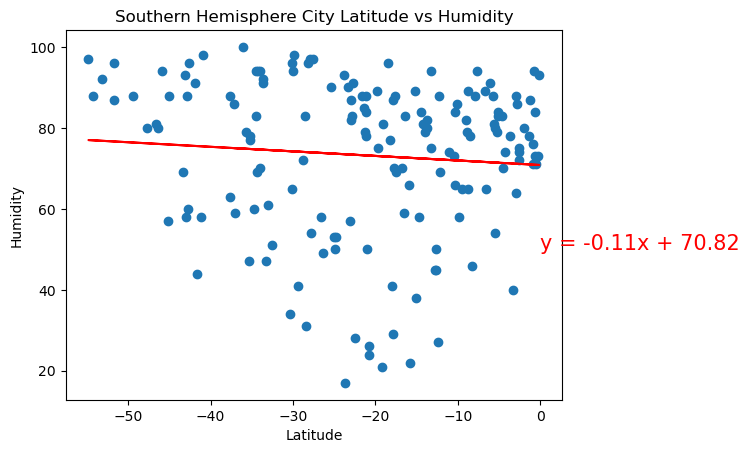

In [28]:
# Linear regression on Southern Hemisphere
x_values = CityWSH_df['Lat']
y_values = CityWSH_df['Humidity']
# Call the function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

### Cloudiness vs. Latitude Linear "Northern Hemisphere"

r-value is: 0.022917300903700446


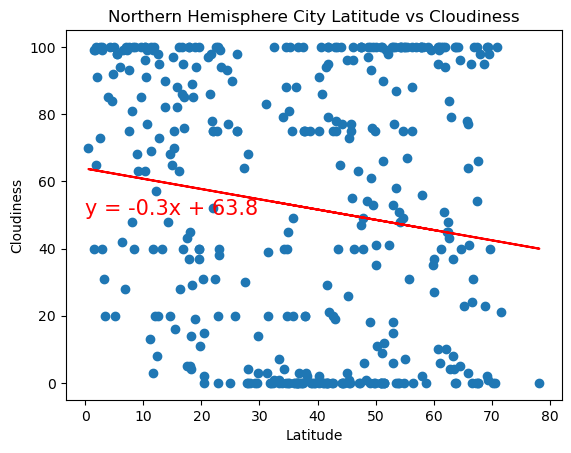

In [29]:
# Linear regression on Northern Hemisphere
x_values = CityWNH_df['Lat']
y_values = CityWNH_df['Cloudiness']
# Call the function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

### Cloudiness vs. Latitude Linear "Southern Hemisphere"

r-value is: 0.04264164158382551


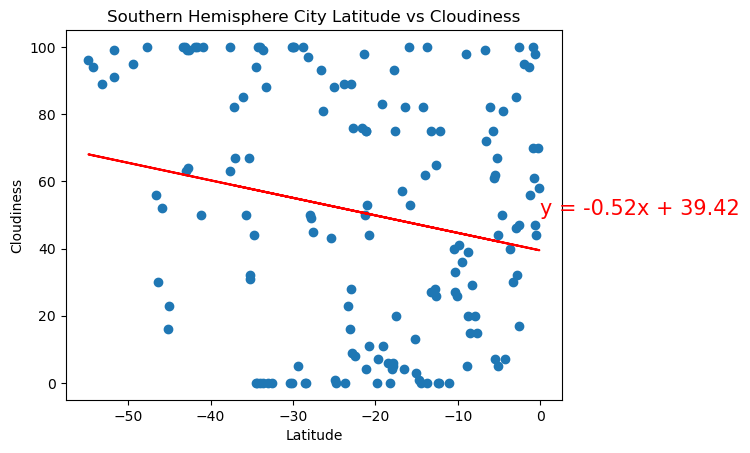

In [30]:
# Linear regression on Southern Hemisphere
x_values = CityWSH_df['Lat']
y_values = CityWSH_df['Cloudiness']
# Call the function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

### Wind Speed vs. Latitude Linear "Northern Hemisphere"

r-value is: 0.008066560906085077


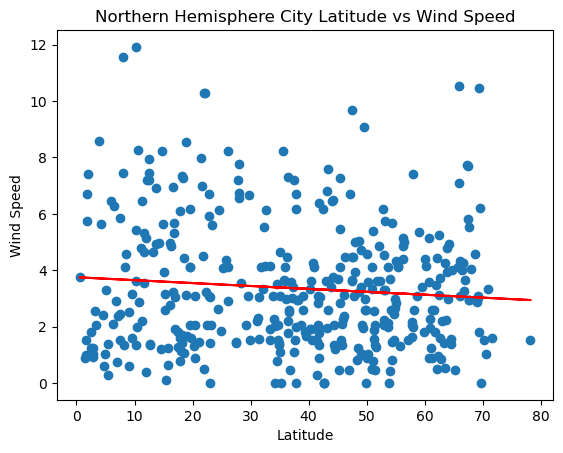

In [31]:
# Linear regression on Northern Hemisphere
x_values = CityWNH_df['Lat']
y_values = CityWNH_df['Wind Speed']
# Call the function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Northern Hemisphere City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()

### Wind Speed vs. Latitude Linear "Southern Hemisphere"

r-value is: 0.003569629529280009


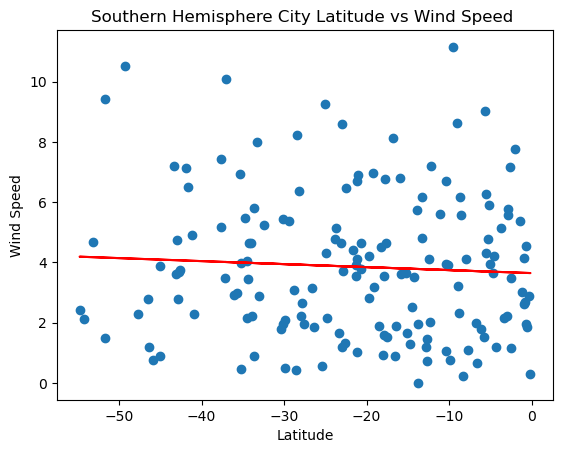

In [32]:
# Linear regression on Southern Hemisphere
x_values = CityWSH_df['Lat']
y_values = CityWSH_df['Wind Speed']
# Call the function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize = 15, color = "red")
plt.title(f"Southern Hemisphere City Latitude vs Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"r-value is: {rvalue**2}")
plt.savefig(f"output_data")
plt.show()